NOTE: Starting a command with ! allows you to run that command in the Jupyter environment's command line.

In [ ]:
!ls

In [1]:
from sidecar import Sidecar
from ipyleaflet import Map, basemaps, basemap_to_tiles, DrawControl
from ipywidgets import IntSlider, ColorPicker

In [3]:
import datacube
dc = datacube.Datacube(config = '/home/alvarez-vanhard_e/.datacube.conf')

In [4]:
# Get available products
dc.list_products()

Empty DataFrame
Columns: [name, description, crs, resolution, tile_size, spatial_dimensions]
Index: []

In [5]:
dc.list_measurements()

KeyError: "None of ['product', 'measurement'] are in the columns"

In [6]:
dc.find_datasets(product='s2_l2a_maja')

ValueError: No products match search terms: {'product': 's2_l2a_maja'}

# Choisir une zone géographique

In [3]:
selection = None

In [7]:
m = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=(48, -2), zoom=5)

draw_control = DrawControl()
draw_control.rectangle = {
    "shapeOptions": {
        "fillColor": "#fca45d",
        "color": "#fca45d",
        "fillOpacity": 1.0
    }
}

def handle_draw(self, action, geo_json):
    """Do something with the GeoJSON when it's drawn on the map"""
    global selection
    selection = geo_json['geometry']['coordinates']

draw_control.on_draw(handle_draw)

m.add_control(draw_control)

In [8]:
sc = Sidecar(title='Sidecar Output')
with sc:
    display(m)

In [9]:
selection

[[[-2.236083, 47.901614],
  [-2.236083, 48.545705],
  [-1.181395, 48.545705],
  [-1.181395, 47.901614],
  [-2.236083, 47.901614]]]

# Choisir une date

In [10]:
## Define Geographic boundaries using a (min,max) tuple.
latitude_bounds = (selection[0][0][1], selection[0][2][1])
longitude_bounds = (selection[0][0][0], selection[0][2][0])

## Specify a date range using a (min,max) tuple  
from datetime import datetime
time = (datetime(2018,1,1), datetime(2018,3,2))

# Choisir un produit et ses propriétés

In [12]:
from utils.notebooks.display_map import display_map
display_map(latitude = latitude_bounds, longitude = longitude_bounds)

ModuleNotFoundError: No module named 'folium'

In [10]:
## define the name you gave your data while it was being indexed or ingested, as well as the platform it was captured on.
platform = "sentinel-2"
product = "s2_l2a_maja" 
#measurements=['red', 'b8']

In [ ]:
#Query datasets !

# Visualisation du datacube sélectionner (dates, bandes, compositions,...)

In [11]:
#Load data using parameters,
ds = dc.load(latitude = latitude_bounds, longitude = longitude_bounds, time = time, product = product,
                    platform = platform, output_crs='EPSG:2154', resolution=(-10, 10),
                       resampling='cubic')
print(ds)

<xarray.Dataset>
Dimensions:      (time: 4, x: 1597, y: 2052)
Coordinates:
  * time         (time) datetime64[ns] 2018-02-08T11:02:11 ... 2018-02-28T11:04:35
  * y            (y) float64 6.822e+06 6.822e+06 ... 6.802e+06 6.802e+06
  * x            (x) float64 3.567e+05 3.567e+05 ... 3.727e+05 3.727e+05
    spatial_ref  int32 2154
Data variables:
    sat_r1       (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    sat_r2       (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    dfp_r1       (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    dfp_r2       (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    clm_r1       (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    clm_r2       (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    mg2_r1       (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    mg2_r2       (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    edg_r1  

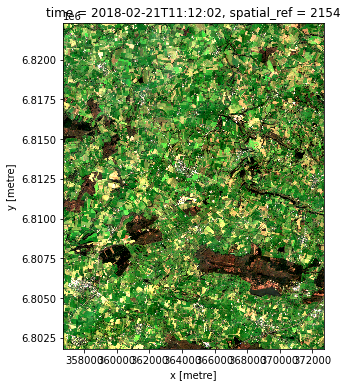

In [13]:
from utils.dea.dea_plotting import rgb
rgb(ds, bands=["b4", "b3", "b2"], index=1)